In [95]:
import randan
from randan.dimension_reduction import PCA
from randan.regression import LinearRegression
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [44]:
data = pd.read_excel('Стартапы.xlsx', index_col = 1)
display(data)

,№,Создатель,Пол,ЗП,Год,Колвочел,Прибыль,Ссылка на интервью,Интервью,community,...,creative,understand,responsible,free,quality,implement,AI,data,research,efficiency
Название,,,,,,,,,,,,,,,,,,,,,
Jasper.ai,1,Dave Rogenmoser,0,197-225к долларов,2021,195,40.0000,https://www.youtube.com/watch?v=J4_mO-MN5gI 1,да,4,...,0,3,1,1,0,0,0,3,0,0
OpenAI,2,Sam Altman,0,0,2015,400,28.0000,https://www.forbes.com/sites/rashishrivastava/...,да,0,...,0,3,0,1,0,0,20,1,0,0
People.ai,3,Oleg Rogynskyy,0,0,2016,300,45.8000,https://www.youtube.com/watch?v=Jvw7R65OgQY 7,да,1,...,1,3,0,0,0,0,3,3,0,0
Observe.AI,4,"Swapnil Jain, Sharath Keshava Narayana, Akash ...",1,0,2017,240,5.0000,https://techcrunch.com/2021/05/17/ai-powered-j...,да,0,...,0,0,0,0,0,0,19,3,0,0
Jerry,5,"Art Agrawal, Musawir Shah, Lina Zhang",0,0,2017,288,58.5000,https://www.youtube.com/watch?v=k35GrJHDBPs 19,да,0,...,0,1,1,1,0,0,0,0,1,0
May Mobility,6,Edwin Olson,0,0,2017,260,4.2000,https://www.youtube.com/watch?v=uHmBZnII4go 37,да,0,...,0,3,0,1,0,2,0,1,0,0
Memora Health,7,"Manav Sevak, Nisarg Patel, Kunaal Naik",0,0,2017,90,18.9000,https://www.youtube.com/watch?v=-lNSepR9_yQ 52,да,17,...,62,0,0,0,0,0,0,0,0,0
VergeSense,8,"Dan Ryan, Kelby Green",0,0,2017,70,18.4000,https://www.youtube.com/watch?v=LcE1CenRewQ 1,да,1,...,0,1,1,1,0,7,0,22,4,0
Caper,9,"Lindon Gao, Ahmed Beshry, Yilin Huang",0,0,2016,15,6.7000,https://www.youtube.com/watch?v=g-MFfXyBHok 1,да,0,...,0,3,0,1,0,0,0,0,0,0


In [3]:
#data.drop(data.tail(5).index,inplace=True) # drop last n rows
#data

,№,Создатель,Пол,ЗП,Год,Колвочел,Прибыль,Ссылка на интервью,Интервью,community,...,creative,understand,responsible,free,quality,implement,AI,data,research,efficiency
Название,,,,,,,,,,,,,,,,,,,,,
Jasper.ai,1,Dave Rogenmoser,м,197-225к долларов,2021,195,40.0000,https://www.youtube.com/watch?v=J4_mO-MN5gI 1,да,4,...,0,3,1,1,0,0,0,3,0,0
OpenAI,2,Sam Altman,м,0,2015,400,28.0000,https://www.forbes.com/sites/rashishrivastava/...,да,0,...,0,3,0,1,0,0,20,1,0,0
People.ai,3,Oleg Rogynskyy,м,0,2016,300,45.8000,https://www.youtube.com/watch?v=Jvw7R65OgQY 7,да,1,...,1,3,0,0,0,0,3,3,0,0
Observe.AI,4,"Swapnil Jain, Sharath Keshava Narayana, Akash ...",ж,0,2017,240,5.0000,https://techcrunch.com/2021/05/17/ai-powered-j...,да,0,...,0,0,0,0,0,0,19,3,0,0
Jerry,5,"Art Agrawal, Musawir Shah, Lina Zhang",м,0,2017,288,58.5000,https://www.youtube.com/watch?v=k35GrJHDBPs 19,да,0,...,0,1,1,1,0,0,0,0,1,0
May Mobility,6,Edwin Olson,м,0,2017,260,4.2000,https://www.youtube.com/watch?v=uHmBZnII4go 37,да,0,...,0,3,0,1,0,2,0,1,0,0
Memora Health,7,"Manav Sevak, Nisarg Patel, Kunaal Naik",м,0,2017,90,18.9000,https://www.youtube.com/watch?v=-lNSepR9_yQ 52,да,17,...,62,0,0,0,0,0,0,0,0,0
VergeSense,8,"Dan Ryan, Kelby Green",м,0,2017,70,18.4000,https://www.youtube.com/watch?v=LcE1CenRewQ 1,да,1,...,0,1,1,1,0,7,0,22,4,0
Caper,9,"Lindon Gao, Ahmed Beshry, Yilin Huang",м,0,2016,15,6.7000,https://www.youtube.com/watch?v=g-MFfXyBHok 1,да,0,...,0,3,0,1,0,0,0,0,0,0


In [45]:
data = data.fillna(0)
data = data.astype({'Прибыль': int})
data = data.astype({'Год': int})
data = data.astype({'Колвочел': int})
data

,№,Создатель,Пол,ЗП,Год,Колвочел,Прибыль,Ссылка на интервью,Интервью,community,...,creative,understand,responsible,free,quality,implement,AI,data,research,efficiency
Название,,,,,,,,,,,,,,,,,,,,,
Jasper.ai,1,Dave Rogenmoser,0,197-225к долларов,2021,195,40,https://www.youtube.com/watch?v=J4_mO-MN5gI 1,да,4,...,0,3,1,1,0,0,0,3,0,0
OpenAI,2,Sam Altman,0,0,2015,400,28,https://www.forbes.com/sites/rashishrivastava/...,да,0,...,0,3,0,1,0,0,20,1,0,0
People.ai,3,Oleg Rogynskyy,0,0,2016,300,45,https://www.youtube.com/watch?v=Jvw7R65OgQY 7,да,1,...,1,3,0,0,0,0,3,3,0,0
Observe.AI,4,"Swapnil Jain, Sharath Keshava Narayana, Akash ...",1,0,2017,240,5,https://techcrunch.com/2021/05/17/ai-powered-j...,да,0,...,0,0,0,0,0,0,19,3,0,0
Jerry,5,"Art Agrawal, Musawir Shah, Lina Zhang",0,0,2017,288,58,https://www.youtube.com/watch?v=k35GrJHDBPs 19,да,0,...,0,1,1,1,0,0,0,0,1,0
May Mobility,6,Edwin Olson,0,0,2017,260,4,https://www.youtube.com/watch?v=uHmBZnII4go 37,да,0,...,0,3,0,1,0,2,0,1,0,0
Memora Health,7,"Manav Sevak, Nisarg Patel, Kunaal Naik",0,0,2017,90,18,https://www.youtube.com/watch?v=-lNSepR9_yQ 52,да,17,...,62,0,0,0,0,0,0,0,0,0
VergeSense,8,"Dan Ryan, Kelby Green",0,0,2017,70,18,https://www.youtube.com/watch?v=LcE1CenRewQ 1,да,1,...,0,1,1,1,0,7,0,22,4,0
Caper,9,"Lindon Gao, Ahmed Beshry, Yilin Huang",0,0,2016,15,6,https://www.youtube.com/watch?v=g-MFfXyBHok 1,да,0,...,0,3,0,1,0,0,0,0,0,0


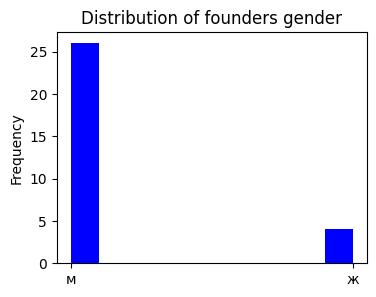

In [7]:
plt.figure(figsize=(4,3))

plt.hist(data['Пол'].dropna(), color='blue')
plt.title('Distribution of founders gender')
#plt.xlabel('viewCount');
plt.ylabel('Frequency');

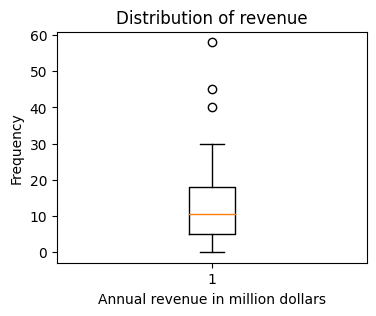

In [8]:
plt.figure(figsize=(4,3))

#data['Прибыль'] = data[data['Прибыль'] > 0]
plt.boxplot(data['Прибыль'].dropna())
plt.title('Distribution of revenue')
plt.xlabel('Annual revenue in million dollars');
plt.ylabel('Frequency');

C:\Users\borodina_al\AppData\Local\Temp\ipykernel_4980\3214204682.py:3: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  plt.hist(data['Прибыль'].dropna(0), color = 'pink')


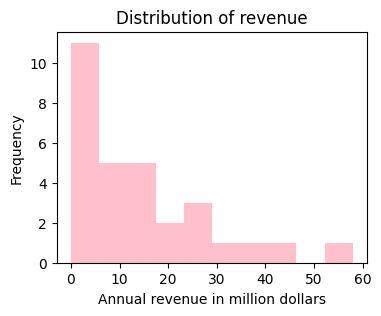

In [9]:
plt.figure(figsize=(4,3))

plt.hist(data['Прибыль'].dropna(0), color = 'pink')
plt.title('Distribution of revenue')
plt.xlabel('Annual revenue in million dollars');
plt.ylabel('Frequency');

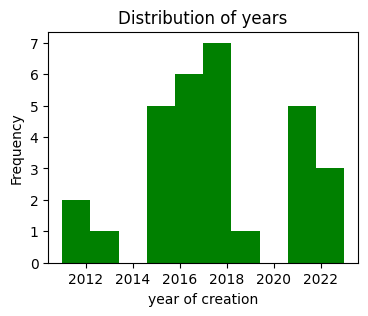

In [11]:
plt.figure(figsize=(4,3))

plt.hist(data['Год'].dropna(), color='green')
plt.title('Distribution of years')
plt.xlabel('year of creation');
plt.ylabel('Frequency');

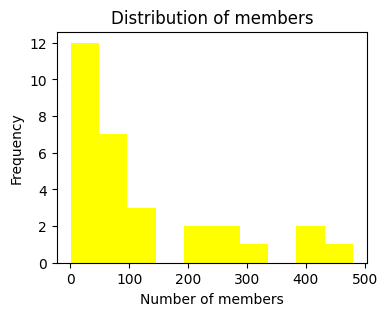

In [12]:
plt.figure(figsize=(4,3))

plt.hist(data['Колвочел'].dropna(), color = 'yellow')
plt.title('Distribution of members')
plt.xlabel('Number of members');
plt.ylabel('Frequency');

In [108]:
data['ncommunity'] = [float(i)/max(data["community"]) for i in data["community"]]
data['nbrand'] = [float(i)/max(data["brand"]) for i in data["brand"]]
data['nteam'] = [float(i)/max(data["team"]) for i in data["team"]]
data['nmission'] = [float(i)/max(data["mission"]) for i in data["mission"]]
data['ncustomer'] = [float(i)/max(data["customer"]) for i in data["customer"]]
data['nonline'] = [float(i)/max(data["online"]) for i in data["online"]]
data['ncommerce'] = [float(i)/max(data["commerce"]) for i in data["commerce"]]
data['ngrowth'] = [float(i)/max(data["growth"]) for i in data["growth"]]
data['nglobal'] = [float(i)/max(data["global"]) for i in data["global"]]
data['nstrategy'] = [float(i)/max(data["strategy"]) for i in data["strategy"]]
data['nfuture'] = [float(i)/max(data["future"]) for i in data["future"]]
data['neducation'] = [float(i)/max(data["education"]) for i in data["education"]]
data['ncreative'] = [float(i)/max(data["creative"]) for i in data["creative"]]
data['nunderstand'] = [float(i)/max(data["understand"]) for i in data["understand"]]
data['nresponsible'] = [float(i)/max(data["responsible"]) for i in data["responsible"]]
data['nfree'] = [float(i)/max(data["free"]) for i in data["free"]]
data['nquality'] = [float(i)/max(data["quality"]) for i in data["quality"]]
data['nimplement'] = [float(i)/max(data["implement"]) for i in data["implement"]]
data['nAI'] = [float(i)/max(data["AI"]) for i in data["AI"]]
data['ndata'] = [float(i)/max(data["data"]) for i in data["data"]]
data['nresearch'] = [float(i)/max(data["research"]) for i in data["research"]]


PCA SUMMARY
------------------

------------------

Explained variance


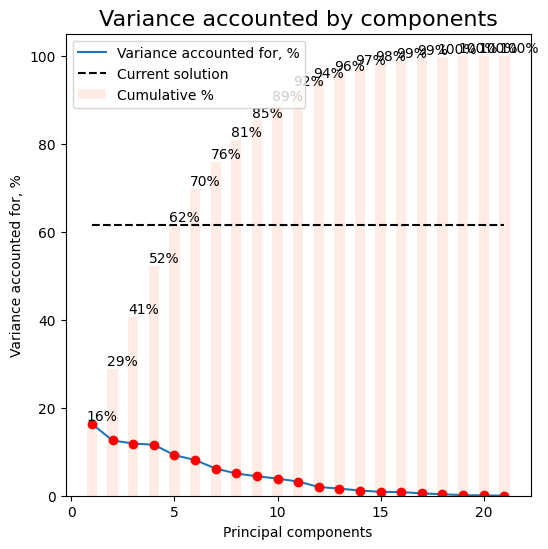

C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\dimension_reduction.py:1040: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.get_explained_variance(scree_plot=True).style\


,Eigenvalue,"Variance accounted for, %",Cumulative %
Component,,,
1,3.425,16.310,16.310
2,2.640,12.570,28.880
3,2.489,11.851,40.731
4,2.434,11.592,52.323
5,1.937,9.225,61.548
6,1.706,8.122,69.670
7,1.297,6.174,75.844
8,1.061,5.052,80.896
9,0.928,4.417,85.313


The model explains 61.548% of variance.
------------------

Rotated component loadings


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\dimension_reduction.py:1052: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.communalities_and_loadings.style\


,Communality,PC1_vrmx,PC2_vrmx,PC3_vrmx,PC4_vrmx,PC5_vrmx
Variable,,,,,,
ncommunity,0.932,-0.008,-0.445,0.853,-0.055,-0.062
nbrand,0.090,0.046,0.104,0.054,-0.121,0.243
nteam,0.693,0.325,0.063,-0.068,0.717,-0.254
nmission,0.474,-0.175,0.121,-0.021,0.575,0.312
ncustomer,0.823,0.880,0.142,-0.110,-0.104,-0.069
nonline,0.886,0.078,0.028,0.917,-0.013,0.197
ncommerce,0.719,0.841,-0.026,0.005,-0.049,0.090
ngrowth,0.643,-0.238,0.150,0.468,0.587,-0.012
nglobal,0.521,-0.214,0.105,-0.047,-0.106,0.672


The minimum communality is 0.09.
------------------

To get component scores, use [model].transform().


TypeError: transform() missing 1 required positional argument: 'data'

In [175]:
vars_ = ['ncommunity', 'nbrand', 'nteam', 'nmission', 'ncustomer', 'nonline', 'ncommerce', 
         'ngrowth', 'nglobal', 'nstrategy', 'nfuture', 'neducation', 'ncreative', 
        'nunderstand', 'nresponsible', 'nfree', 'nquality', 'nimplement',
        'nAI', 'ndata', 'nresearch']

# with this code, you will immediately see the results
pca = PCA(n_components=5, rotation='varimax').fit(data, variables=vars_)

In [178]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data[['ncommunity', 'nbrand', 'nteam', 'nmission', 'ncustomer', 'nonline', 'ncommerce', 
         'ngrowth', 'nglobal', 'nstrategy', 'nfuture', 'neducation', 'ncreative', 
        'nunderstand', 'nresponsible', 'nfree', 'nquality', 'nimplement',
        'nAI', 'ndata', 'nresearch']])
chi_square_value, p_value

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(data[['ncommunity', 'nbrand', 'nteam', 'nmission', 'ncustomer', 'nonline', 'ncommerce', 
         'ngrowth', 'nglobal', 'nstrategy', 'nfuture', 'neducation', 'ncreative', 
        'nunderstand', 'nresponsible', 'nfree', 'nquality', 'nimplement',
        'nAI', 'ndata', 'nresearch']])

C:\Users\borodina_al\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [165]:
#5 факторный PCA
data['collaborate_ag'] = data[['ncustomer', 'ncommerce', 'nunderstand', 'nfree', 'ndata']].sum(axis=1)
data['business_ag'] = data[['nstrategy', 'neducation', 'ncreative']].sum(axis=1)
data['future_ag'] = data[['ncommunity','nonline', 'nquality']].sum(axis=1)
data['creativity_ag'] = data[['nteam', 'nmission', 'ngrowth', 'nresponsible', 'nimplement']].sum(axis=1)
data['AI_ag'] = data[['nbrand', 'nglobal', 'nfuture', 'nAI', 'nresearch']].sum(axis=1)

# Вывод результата:
display(data[['collaborate_ag', 'business_ag', 'future_ag', 'creativity_ag', 'AI_ag']])

,collaborate_ag,business_ag,future_ag,creativity_ag,AI_ag
Название,,,,,
Jasper.ai,0.850317,0.076923,0.129032,0.778333,0.168939
OpenAI,0.311848,0.000000,0.000000,0.061667,1.192982
People.ai,0.403726,0.093052,0.032258,0.946667,0.120614
Observe.AI,0.498044,0.076923,0.047619,0.061667,0.541667
Jerry,0.172727,0.000000,0.000000,2.550000,0.416667
May Mobility,0.311848,0.000000,0.000000,0.114298,0.666667
Memora Health,0.062500,3.000000,0.548387,0.040000,0.000000
VergeSense,0.533383,0.758974,0.032258,0.620877,0.916667
Caper,0.363636,0.076923,0.000000,0.246667,0.291667


In [182]:
import scipy.stats as stats

#perform Bartlett's test 
stats.bartlett(data[['ncommunity', 'nteam', 'ncustomer', 'nonline', 'ncommerce', 
         'ngrowth', 'nglobal', 'nstrategy', 'nfuture', 'neducation', 'ncreative', 
        'nresponsible', 'nfree', 'nquality', 'nimplement']])

KeyError: ('ncommunity', 'nteam', 'ncustomer', 'nonline', 'ncommerce', 'ngrowth', 'nglobal', 'nstrategy', 'nfuture', 'neducation', 'ncreative', 'nresponsible', 'nfree', 'nquality', 'nimplement')

In [158]:
#4 факторный PCA
#data['collaborate_ag'] = data[['ncustomer', 'ncommerce', 'nfree', 'ndata']].sum(axis=1)
#data['business_ag'] = data[['nbrand', 'nstrategy', 'neducation', 'ncreative', 'nunderstand', 'nAI']].sum(axis=1)
#data['future_ag'] = data[['ncommunity','nonline', 'ngrowth', 'nquality', 'nresearch']].sum(axis=1)
#data['creativity_ag'] = data[['nteam', 'nmission', 'nfuture', 'nresponsible',  'nimplement']].sum(axis=1)

In [171]:
#3 факторный PCA
#data['collaborate_ag'] = data[['nbrand', 'ncustomer', 'ncommerce', 'nunderstand', 'nfree', 'ndata']].sum(axis=1)
#data['future_ag'] = data[['ncommunity','nonline', 'nquality', 'nAI', 'nresearch']].sum(axis=1)
#data['creativity_ag'] = data[['nteam', 'nmission', 'ngrowth', 'nresponsible', 'nimplement', 'nglobal', 'nfuture',
                             'nstrategy', 'neducation', 'ncreative']].sum(axis=1)
# Вывод результата:
#display(data[['collaborate_ag', 'future_ag', 'creativity_ag']])

,collaborate_ag,future_ag,creativity_ag
Название,,,
Jasper.ai,0.977589,0.129032,0.896923
OpenAI,0.311848,0.526316,0.728333
People.ai,0.403726,0.111205,1.081385
Observe.AI,0.498044,0.547619,0.180256
Jerry,0.172727,0.125000,2.841667
May Mobility,0.311848,0.000000,0.780965
Memora Health,0.062500,0.548387,3.040000
VergeSense,0.533383,0.532258,1.796518
Caper,0.363636,0.000000,0.615256


In [114]:
data['norm_collaborate_ag'] = [float(i)/max(data["collaborate_ag"]) for i in data["collaborate_ag"]]
data['norm_business_ag'] = [float(i)/max(data["business_ag"]) for i in data["business_ag"]]
data['norm_future_ag'] = [float(i)/max(data["future_ag"]) for i in data["future_ag"]]
data['norm_creativity_ag'] = [float(i)/max(data["creativity_ag"]) for i in data["creativity_ag"]]
data['norm_AI_ag'] = [float(i)/max(data["AI_ag"]) for i in data["AI_ag"]]


display(data[['norm_collaborate_ag', 'norm_business_ag', 'norm_future_ag', 
              'norm_creativity_ag', 'norm_AI_ag']])

,norm_collaborate_ag,norm_business_ag,norm_future_ag,norm_creativity_ag,norm_AI_ag
Название,,,,,
Jasper.ai,0.208772,0.025641,0.043011,0.304130,0.057922
OpenAI,0.076566,0.000000,0.000000,0.024096,0.409023
People.ai,0.099124,0.031017,0.010753,0.369906,0.041353
Observe.AI,0.122281,0.025641,0.015873,0.024096,0.185714
Jerry,0.042408,0.000000,0.000000,0.996401,0.142857
May Mobility,0.076566,0.000000,0.000000,0.044662,0.228571
Memora Health,0.015345,1.000000,0.182796,0.015630,0.000000
VergeSense,0.130957,0.252991,0.010753,0.242605,0.314286
Caper,0.089281,0.025641,0.000000,0.096384,0.100000


In [172]:
#norm_collaborate_ag 
# with this code, you will immediately see the results
formula = 'collaborate_ag = Пол + Колвочел + Прибыль + Год'

regr = LinearRegression().fit(
    data, 
    formula=formula,
    categorical_variables=['Пол'],
    collinearity_statistics=True
)

# this is how you can predict values of the dependent variable for the given data... 
predictions = regr.predict()

# ... save various types of residuals ...
residuals = regr.save_residuals(studentized=True)

# ... and even save values of independent variables 
# if you didn't create them manually (e.g. dummies and interactions) ...
indep_vars = regr.save_independent_variables()


LINEAR REGRESSION SUMMARY
------------------

Model summary


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:345: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_r2().style\


,R,R Squared,Adj. R Squared
,0.429,0.184,0.054


------------------

ANOVA


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:350: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_F().style\


,Sum of Squares,df,Mean Square,F,p-value
Regression,3.301,4.000,0.825,1.412,0.259
Residual,14.611,25.000,0.584,nan,nan
Total,17.912,29.000,nan,nan,nan


------------------

Coefficients


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:356: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary().style\


,B,Std. Error,Beta,t,p-value,LB CI (95%),UB CI (95%),Tolerance,VIF
Constant,-9.498,97.908,nan,-0.097,0.923,-211.143,192.147,nan,nan
"Пол = ""1""",-0.785,0.423,-0.345,-1.857,0.075,-1.655,0.086,0.944,1.060
Колвочел,0.001,0.001,0.115,0.456,0.653,-0.002,0.004,0.511,1.959
Прибыль,-0.023,0.014,-0.411,-1.669,0.108,-0.051,0.005,0.538,1.860
Год,0.005,0.049,0.021,0.108,0.915,-0.095,0.105,0.881,1.135


In [167]:
#norm_business_ag
# with this code, you will immediately see the results
formula = 'business_ag = Пол + Колвочел + Прибыль + Год'

regr = LinearRegression().fit(
    data, 
    formula=formula,
    categorical_variables=['Пол'],
    collinearity_statistics=True
)

# this is how you can predict values of the dependent variable for the given data... 
predictions = regr.predict()

# ... save various types of residuals ...
residuals = regr.save_residuals(studentized=True)

# ... and even save values of independent variables 
# if you didn't create them manually (e.g. dummies and interactions) ...
indep_vars = regr.save_independent_variables()


LINEAR REGRESSION SUMMARY
------------------

Model summary


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:345: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_r2().style\


,R,R Squared,Adj. R Squared
,0.194,0.037,-0.117


------------------

ANOVA


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:350: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_F().style\


,Sum of Squares,df,Mean Square,F,p-value
Regression,0.339,4.000,0.085,0.243,0.911
Residual,8.702,25.000,0.348,nan,nan
Total,9.041,29.000,nan,nan,nan


------------------

Coefficients


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:356: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary().style\


,B,Std. Error,Beta,t,p-value,LB CI (95%),UB CI (95%),Tolerance,VIF
Constant,7.194,75.561,nan,0.095,0.925,-148.426,162.815,nan,nan
"Пол = ""1""",-0.141,0.326,-0.087,-0.433,0.669,-0.813,0.530,0.944,1.060
Колвочел,-0.001,0.001,-0.210,-0.764,0.452,-0.003,0.001,0.511,1.959
Прибыль,0.007,0.011,0.178,0.664,0.513,-0.015,0.029,0.538,1.860
Год,-0.003,0.037,-0.019,-0.092,0.927,-0.081,0.074,0.881,1.135


In [173]:
#norm_future_ag
# with this code, you will immediately see the results
formula = 'future_ag = Пол + Колвочел + Прибыль + Год'

regr = LinearRegression().fit(
    data, 
    formula=formula,
    categorical_variables=['Пол'],
    collinearity_statistics=True
)

# this is how you can predict values of the dependent variable for the given data... 
predictions = regr.predict()

# ... save various types of residuals ...
residuals = regr.save_residuals(studentized=True)

# ... and even save values of independent variables 
# if you didn't create them manually (e.g. dummies and interactions) ...
indep_vars = regr.save_independent_variables()


LINEAR REGRESSION SUMMARY
------------------

Model summary


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:345: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_r2().style\


,R,R Squared,Adj. R Squared
,0.279,0.078,-0.070


------------------

ANOVA


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:350: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_F().style\


,Sum of Squares,df,Mean Square,F,p-value
Regression,0.793,4.000,0.198,0.526,0.718
Residual,9.429,25.000,0.377,nan,nan
Total,10.222,29.000,nan,nan,nan


------------------

Coefficients


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:356: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary().style\


,B,Std. Error,Beta,t,p-value,LB CI (95%),UB CI (95%),Tolerance,VIF
Constant,19.070,78.654,nan,0.242,0.810,-142.920,181.060,nan,nan
"Пол = ""1""",-0.178,0.340,-0.104,-0.525,0.604,-0.878,0.521,0.944,1.060
Колвочел,0.001,0.001,0.192,0.712,0.483,-0.002,0.003,0.511,1.959
Прибыль,-0.015,0.011,-0.357,-1.363,0.185,-0.037,0.008,0.538,1.860
Год,-0.009,0.039,-0.048,-0.234,0.817,-0.089,0.071,0.881,1.135


In [174]:
#norm_creativity_ag 
# with this code, you will immediately see the results
formula = 'creativity_ag = Пол + Колвочел + Прибыль + Год'

regr = LinearRegression().fit(
    data, 
    formula=formula,
    categorical_variables=['Пол'],
    collinearity_statistics=True
)

# this is how you can predict values of the dependent variable for the given data... 
predictions = regr.predict()

# ... save various types of residuals ...
residuals = regr.save_residuals(studentized=True)

# ... and even save values of independent variables 
# if you didn't create them manually (e.g. dummies and interactions) ...
indep_vars = regr.save_independent_variables()


LINEAR REGRESSION SUMMARY
------------------

Model summary


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:345: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_r2().style\


,R,R Squared,Adj. R Squared
,0.635,0.403,0.307


------------------

ANOVA


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:350: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_F().style\


,Sum of Squares,df,Mean Square,F,p-value
Regression,11.729,4.000,2.932,4.212,0.010
Residual,17.404,25.000,0.696,nan,nan
Total,29.133,29.000,nan,nan,nan


------------------

Coefficients


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:356: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary().style\


,B,Std. Error,Beta,t,p-value,LB CI (95%),UB CI (95%),Tolerance,VIF
Constant,-271.656,106.857,nan,-2.542,0.018,-491.732,-51.581,nan,nan
"Пол = ""1""",-0.811,0.461,-0.280,-1.758,0.091,-1.761,0.139,0.944,1.060
Колвочел,-0.002,0.002,-0.284,-1.313,0.201,-0.005,0.001,0.511,1.959
Прибыль,0.024,0.015,0.337,1.599,0.122,-0.007,0.054,0.538,1.860
Год,0.135,0.053,0.421,2.553,0.017,0.026,0.244,0.881,1.135


In [170]:
#norm_AI_ag
# with this code, you will immediately see the results
formula = 'AI_ag = Пол + Колвочел + Прибыль + Год'

regr = LinearRegression().fit(
    data, 
    formula=formula,
    categorical_variables=['Пол'],
    collinearity_statistics=True
)

# this is how you can predict values of the dependent variable for the given data... 
predictions = regr.predict()

# ... save various types of residuals ...
residuals = regr.save_residuals(studentized=True)

# ... and even save values of independent variables 
# if you didn't create them manually (e.g. dummies and interactions) ...
indep_vars = regr.save_independent_variables()


LINEAR REGRESSION SUMMARY
------------------

Model summary


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:345: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_r2().style\


,R,R Squared,Adj. R Squared
,0.450,0.202,0.074


------------------

ANOVA


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:350: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary_F().style\


,Sum of Squares,df,Mean Square,F,p-value
Regression,2.359,4.000,0.590,1.583,0.210
Residual,9.314,25.000,0.373,nan,nan
Total,11.673,29.000,nan,nan,nan


------------------

Coefficients


C:\Users\borodina_al\Anaconda3\lib\site-packages\randan\regression.py:356: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  display(self.summary().style\


,B,Std. Error,Beta,t,p-value,LB CI (95%),UB CI (95%),Tolerance,VIF
Constant,-139.245,78.171,nan,-1.781,0.087,-300.242,21.752,nan,nan
"Пол = ""1""",-0.324,0.337,-0.176,-0.960,0.346,-1.019,0.371,0.944,1.060
Колвочел,0.001,0.001,0.162,0.647,0.524,-0.002,0.003,0.511,1.959
Прибыль,-0.017,0.011,-0.376,-1.543,0.135,-0.039,0.006,0.538,1.860
Год,0.069,0.039,0.341,1.793,0.085,-0.010,0.149,0.881,1.135
